<a href="https://colab.research.google.com/github/SahmyookHealth-Jung/BigData_colab/blob/main/%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글화


In [ ]:
# 한글화
# Google Colab matplotlib 한글 폰트 오류 문제 해결
# colab과 google Drive 연동을 위한 인증 및 네트워크 디렉토리 마운트
# from google.colab import auth
# auth.authenticate_user()

# from google.colab import drive #외부파일을 넣어주는 작업임
# drive.mount('/content/drive')

# 1. 나눔 폰트 다운
!sudo apt-get install -y fonts-nanum #외부명령 나눔폰트 설치함
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 런타임 다시 시작
import matplotlib.pyplot as plt
plt.rc('font', family='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')  #plt를 나눔폰트로 지정
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

# 1주차

# 7주차
(위암 추출)


In [ ]:
# prompt: /content/국립암센터_암발생 통계 정보_20231228.csv 파일을 불러와서 암종에서 위암만 추출해서 파일명을 위암.csv 로 하는 코드를 생성해줘

import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('/content/국립암센터_암발생 통계 정보_20231228.csv', encoding='utf-8')  # 파일 인코딩 확인 필요

# '암종' 열에서 '위암'만 추출
df_stomach_cancer = df[df['암종'] == '위암']

# '위암.csv' 파일로 저장
df_stomach_cancer.to_csv('위암.csv', encoding='utf-8', index=False)  # 저장 파일 인코딩 확인 필요

열 이름: Index(['발생연도', '성별', '국제질병분류', '암종', '연령군', '발생자수', '조발생률'], dtype='object')


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

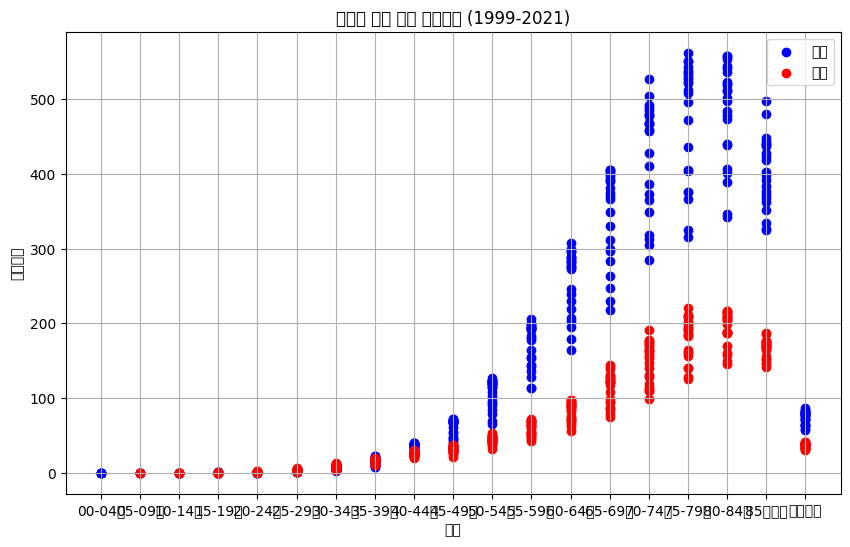

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv('/content/위암.csv', encoding='utf-8')

# 데이터프레임의 열 이름 출력
print("열 이름:", df.columns)

# 발생연도에서 유효한 연도만 필터링 (4자리 숫자)
df = df[df['발생연도'].str.match(r'^\d{4}$')]  # 4자리 숫자만 필터링

# '발생연도' 열을 정수형으로 변환
df['발생연도'] = df['발생연도'].astype(int)

# 발생연도가 1999년부터 2021년 사이인 데이터만 추출
df = df[(df['발생연도'] >= 1999) & (df['발생연도'] <= 2021)]

# 남성 데이터와 여성 데이터 분리
df_male = df[df['성별'] == '남자']
df_female = df[df['성별'] == '여자']

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df_male['연령군'], df_male['조발생률'], color='blue', label='남자')  # 연령열 수정
plt.scatter(df_female['연령군'], df_female['조발생률'], color='red', label='여자')  # 연령열 수정

plt.xlabel('나이')
plt.ylabel('조발생률')
plt.title('나이에 따른 위암 조발생률 (1999-2021)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('/content/위암.csv', encoding='utf-8')

# 연령군을 수치형으로 변환하는 함수 정의
def age_group_to_midpoint(age_group):
    if age_group == '00-04세':
        return 2
    elif age_group == '05-09세':
        return 7
    elif age_group == '10-14세':
        return 12
    elif age_group == '15-19세':
        return 17
    elif age_group == '20-24세':
        return 22
    elif age_group == '25-29세':
        return 27
    elif age_group == '30-34세':
        return 32
    elif age_group == '35-39세':
        return 37
    elif age_group == '40-44세':
        return 42
    elif age_group == '45-49세':
        return 47
    elif age_group == '50-54세':
        return 52
    elif age_group == '55-59세':
        return 57
    elif age_group == '60-64세':
        return 62
    elif age_group == '65-69세':
        return 67
    elif age_group == '70-74세':
        return 72
    elif age_group == '75-79세':
        return 77
    elif age_group == '80-84세':
        return 82
    elif age_group == '85세 이상':
        return 90  # 예시로 90세로 설정
    return None  # 기타 연령군에 대한 기본값

# 연령군을 수치형으로 변환
df['연령'] = df['연령군'].apply(age_group_to_midpoint)

# 조발생률 열을 수치형으로 변환 (필요한 경우)
df['조발생률'] = pd.to_numeric(df['조발생률'], errors='coerce')

# 유효한 데이터만 필터링
valid_data = df[['연령', '조발생률']].dropna()

# 상관계수 계산
correlation = valid_data['연령'].corr(valid_data['조발생률'])

print(f"연령군과 조발생률 사이의 상관계수: {correlation}")


연령군과 조발생률 사이의 상관계수: 0.8009040181753191


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Colab에 이미 익숙하다면 이 동영상을 통해 양방향 테이블, 코드 실행 기록 보기, 명령어 팔레트에 관해 알아보세요.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  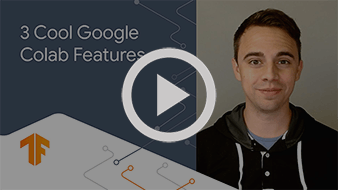
  </a>
</center>

In [ ]:
# prompt: A학생이 평균 3시간 공부하고 표준편차는 0.4이었고 B학생은 평균 6시간 공부하고 표준편차가 0.9이었다면 어떤 학생이 꾸준하게 공부했을까를 알려주는 파이썬 코드 작성해줘

def analyze_study_consistency(mean_a, std_dev_a, mean_b, std_dev_b):
  """
  두 학생의 공부 시간 데이터를 분석하여 꾸준함을 비교합니다.

  Args:
    mean_a: 학생 A의 평균 공부 시간
    std_dev_a: 학생 A의 공부 시간 표준편차
    mean_b: 학생 B의 평균 공부 시간
    std_dev_b: 학생 B의 공부 시간 표준편차

  Returns:
    더 꾸준히 공부한 학생의 이름 ('A' 또는 'B')
  """
  if std_dev_a < std_dev_b:
    return "A"
  else:
    return "B"

# 학생 A의 데이터
mean_a = 3
std_dev_a = 0.4

# 학생 B의 데이터
mean_b = 6
std_dev_b = 0.9

# 결과 출력
result = analyze_study_consistency(mean_a, std_dev_a, mean_b, std_dev_b)
print(f"학생 {result}가 더 꾸준하게 공부했습니다.")


# 6주차


In [ ]:
# prompt: 한 달은 몇 분으로 되어있는지 파이썬 코드로 작성해줘

def calculate_minutes_in_month():
  """
  한 달은 몇 분으로 되어있는지 계산합니다.
  """
  days_in_month = 30  # 평균적인 한 달의 날짜 수
  hours_in_day = 24
  minutes_in_hour = 60

  total_minutes = days_in_month * hours_in_day * minutes_in_hour
  return total_minutes

minutes_in_month = calculate_minutes_in_month()
print(f"한 달은 {minutes_in_month}분입니다.")


In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

위 셀의 코드를 실행하려면 셀을 클릭하여 선택한 후 코드 왼쪽의 실행 버튼을 누르거나 단축키 'Command/Ctrl+Enter'를 사용하세요. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

특정 셀에서 정의한 변수를 나중에 다른 셀에서 사용할 수 있습니다.

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab 메모장을 사용하면 <strong>실행 코드</strong>와 <strong>서식 있는 텍스트</strong>를 <strong>이미지</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> 등과 함께 하나의 문서로 통합할 수 있습니다. Colab 메모장을 만들면 Google Drive 계정에 저장됩니다. Colab 메모장을 간편하게 공유하여 동료나 친구들이 댓글을 달거나 수정하도록 할 수 있습니다. 자세히 알아보려면 <a href="/notebooks/basic_features_overview.ipynb">Colab 개요</a>를 참조하세요. 새 Colab 메모장을 만들려면 위의 파일 메뉴를 사용하거나 다음 링크로 이동하세요. <a href="http://colab.research.google.com#create=true">새 Colab 메모장 만들기</a>

Colab 메모장은 Colab에서 호스팅하는 Jupyter 메모장입니다. Jupyter 프로젝트에 관해 자세히 알아보려면 <a href="https://www.jupyter.org">jupyter.org</a>를 참조하세요.

# 2주차


# 4주차


# 5주차


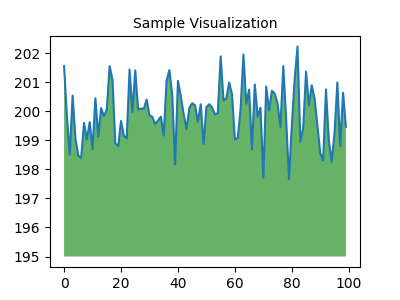

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Google Drive 계정에서 스프레드시트를 비롯한 데이터를 Colab 메모장으로 가져오거나 GitHub 등의 여러 다른 소스에서 데이터를 가져올 수 있습니다. Colab을 데이터 과학에 활용하는 방법과 데이터 가져오기에 관해 자세히 알아보려면 <a href="#working-with-data">데이터 사용하기</a> 아래 링크를 참조하세요.

Colab은 다음과 같은 분야의 머신러닝 커뮤니티에서 널리 쓰이고 있습니다.
- TensorFlow 시작하기
- 신경망 개발 및 학습시키기
- TPU로 실험하기
- AI 연구 보급하기
- 튜토리얼 만들기

머신러닝 적용 사례를 보여 주는 Colab 메모장 샘플을 확인하려면 아래 <a href="#machine-learning-examples">머신러닝 예시</a>를 참조하세요.

# 3주차


In [ ]:
# prompt: 주사위를 던졌을 때 2의 배수가 나올 수 있는 확률을 출력해줘

# 주사위의 눈은 1부터 6까지 있습니다.
possible_outcomes = [1, 2, 3, 4, 5, 6]

# 2의 배수인 눈을 찾습니다.
favorable_outcomes = [outcome for outcome in possible_outcomes if outcome % 2 == 0]

# 2의 배수가 나올 확률을 계산합니다.
probability = len(favorable_outcomes) / len(possible_outcomes)

print(f"주사위를 던졌을 때 2의 배수가 나올 확률은 {probability}입니다.")


앞앞앞
앞앞뒤
앞뒤앞
앞뒤뒤
뒤앞앞
뒤앞뒤
뒤뒤앞
뒤뒤뒤


In [ ]:
# prompt: 주사위를 던졌을때 2의 배수가 나올 확률을 출력해줘

def calculate_probability_of_multiple_of_2():
  """
  주사위를 던졌을 때 2의 배수가 나올 확률을 계산합니다.
  """
  total_outcomes = 6  # 주사위의 총 경우의 수 (1, 2, 3, 4, 5, 6)
  favorable_outcomes = 3  # 2의 배수인 경우의 수 (2, 4, 6)

  probability = favorable_outcomes / total_outcomes
  return probability

probability = calculate_probability_of_multiple_of_2()
print(f"주사위를 던졌을 때 2의 배수가 나올 확률은 {probability}입니다.")


In [ ]:
# prompt: 오타니가 10000번 타석에 들어가서 안타를 칠 확률을 이항분포로 나타내줘

import numpy as np
from scipy.stats import binom

# 오타니의 안타 확률 (예시)
p = 0.3  # 오타니의 안타 확률을 0.3으로 가정합니다.

# 타석 수
n = 10000

# 이항 분포를 사용하여 안타를 칠 확률 계산
k = np.arange(0, n + 1)  # 0부터 n까지의 안타 수
probabilities = binom.pmf(k, n, p)

# 예를 들어, 3000개의 안타를 칠 확률 출력
print(f"오타니가 10000번 타석에 들어가서 3000개의 안타를 칠 확률: {probabilities[3000]:.8f}")

# 전체 안타 확률 분포 출력
# print(probabilities)


오타니가 10000번 타석에 들어가서 3000개의 안타를 칠 확률: 0.00870536


   타석 수        확률
0     1  0.320000
1     2  0.217600
2     3  0.147968
3     4  0.100618
4     5  0.068420
5     6  0.046526
6     7  0.031638
7     8  0.021514
8     9  0.014629
9    10  0.009948


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

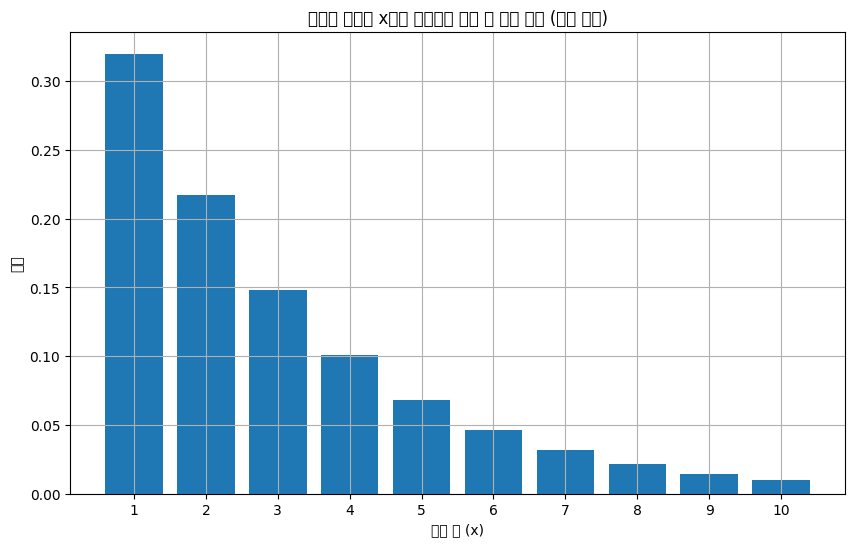

In [ ]:
# prompt: 오타니가 홈런을 칠 확률이 32퍼센트인데 이 선수가 x번째 타석에서 홈런 칠 확률 분포를 기하 분포표를 출력해줘    (1<=x<=10) , 시각화 테이블 형태로 출력해주라 ( x축에 타석 수, y 축의 확률 분포를 출력)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 오타니의 홈런 확률
p = 0.32

# 기하 분포 계산
def geometric_probability(x, p):
  """
  기하 분포 확률 계산

  Args:
    x: x번째 타석
    p: 홈런 확률

  Returns:
    x번째 타석에서 홈런 칠 확률
  """
  return (1 - p)**(x - 1) * p


# 1부터 10번째 타석까지의 확률 계산
probabilities = [geometric_probability(x, p) for x in range(1, 11)]

# 데이터프레임 생성
df = pd.DataFrame({'타석 수': range(1, 11), '확률': probabilities})

# 테이블 출력
print(df)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(df['타석 수'], df['확률'])
plt.xlabel('타석 수 (x)')
plt.ylabel('확률')
plt.title('오타니 선수의 x번째 타석에서 홈런 칠 확률 분포 (기하 분포)')
plt.xticks(df['타석 수'])
plt.grid(True)
plt.show()


1시간 동안 손님이 10명 올 확률: 0.0993


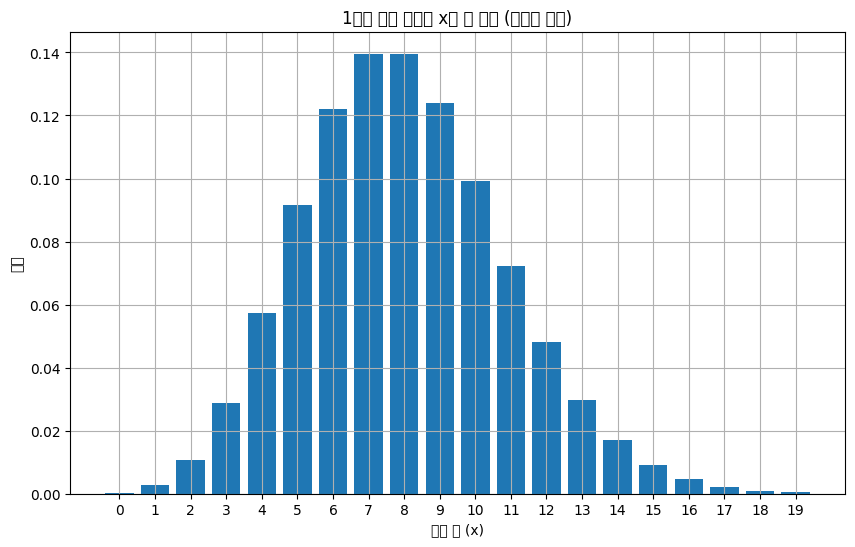

In [ ]:
# prompt: 어느 가게에 1시간당 평균 8명의 손님이 온다. 이때, 1시간 동안 손님이 10명 올 확률을 포아송분포를 사용해서 도표로 알려줘

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 람다 (평균 손님 수)
lam = 8

# x (손님 수)
x = np.arange(0, 20)

# 포아송 분포 확률 계산
probabilities = poisson.pmf(x, lam)

# 도표 출력
plt.figure(figsize=(10, 6))
plt.bar(x, probabilities)
plt.xlabel('손님 수 (x)')
plt.ylabel('확률')
plt.title('1시간 동안 손님이 x명 올 확률 (포아송 분포)')
plt.xticks(x)
plt.grid(True)

# 1시간 동안 손님이 10명 올 확률 출력
probability_10_customers = poisson.pmf(10, lam)
print(f"1시간 동안 손님이 10명 올 확률: {probability_10_customers:.4f}")

plt.show()


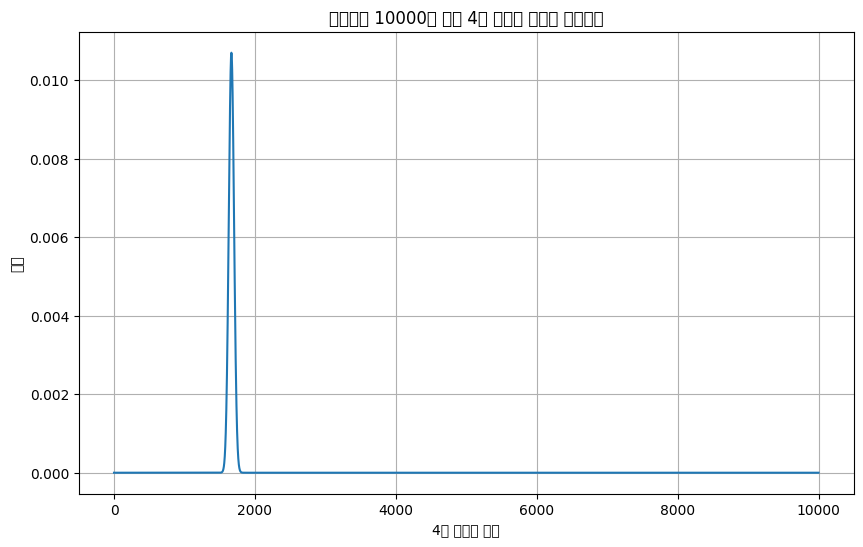

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


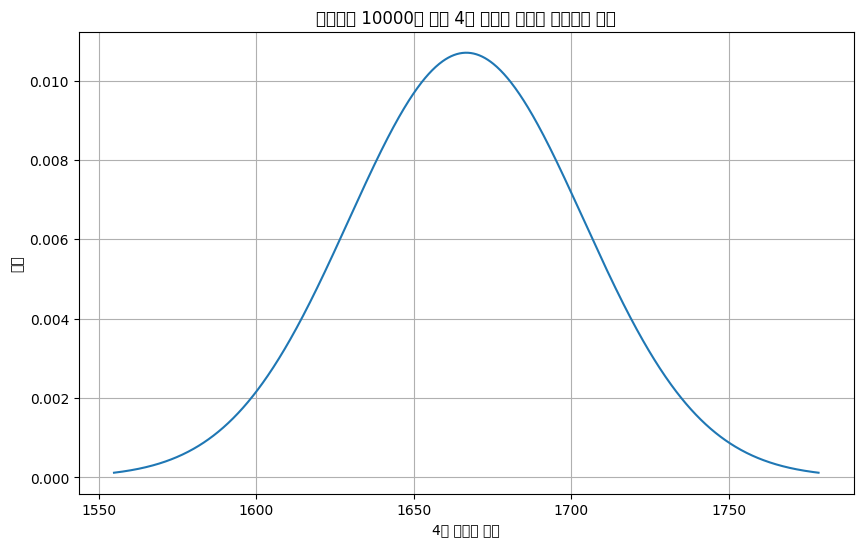

In [ ]:
# prompt: 주사위를 10000번 던져 4가 나오는 횟수의 이항분포 도표 와 정규분포 도표를 출력해줘

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm

# 주사위를 10000번 던져 4가 나오는 횟수의 이항분포 계산
n = 10000  # 시행 횟수
p = 1/6  # 4가 나올 확률
k = np.arange(0, n + 1)  # 4가 나오는 횟수
probabilities_binom = binom.pmf(k, n, p)

# 이항분포 도표 출력
plt.figure(figsize=(10, 6))
plt.plot(k, probabilities_binom)
plt.xlabel('4가 나오는 횟수')
plt.ylabel('확률')
plt.title('주사위를 10000번 던져 4가 나오는 횟수의 이항분포')
plt.grid(True)
plt.show()


# 정규분포 근사를 위한 평균과 표준편차 계산
mean = n * p
std_dev = np.sqrt(n * p * (1 - p))

# 정규분포 도표 출력
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 1000)
probabilities_norm = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, probabilities_norm)
plt.xlabel('4가 나오는 횟수')
plt.ylabel('확률')
plt.title('주사위를 10000번 던져 4가 나오는 횟수의 정규분포 근사')
plt.grid(True)
plt.show()


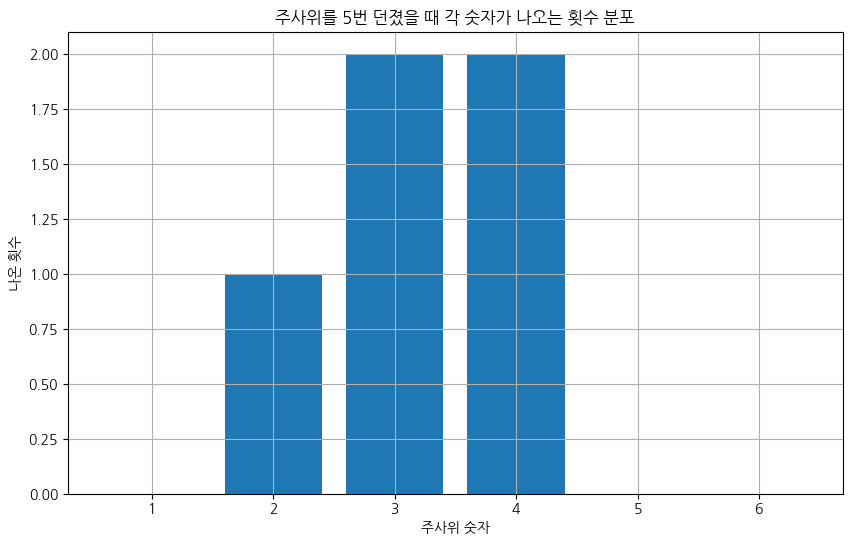

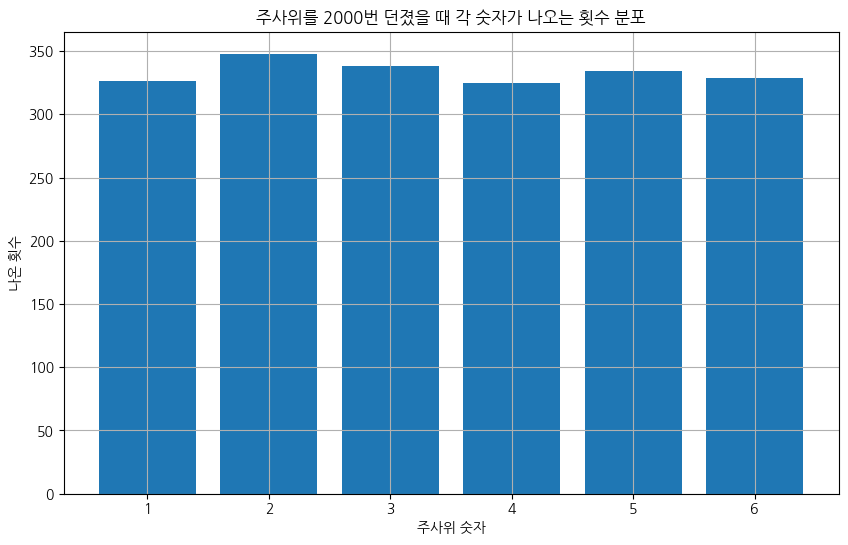

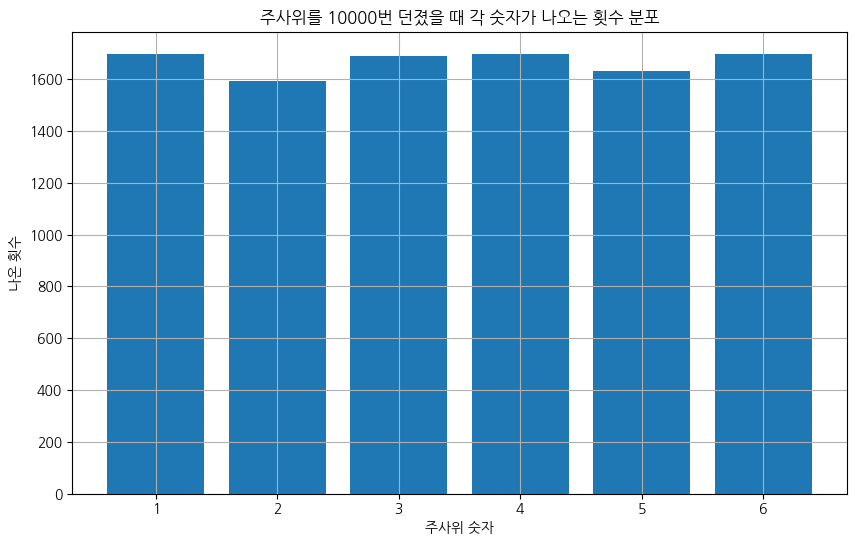

In [ ]:
# prompt: 주사위를 5번,2000번,10000번 던졌을 때 분포를 바차트로 출력

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def plot_dice_distribution(n_trials):
  """
  주사위를 n_trials번 던졌을 때 각 숫자가 나오는 횟수의 분포를 바 차트로 출력합니다.

  Args:
    n_trials: 주사위를 던지는 횟수
  """
  p = 1/6  # 각 숫자가 나올 확률
  possible_outcomes = np.arange(1, 7)  # 주사위의 가능한 결과 (1~6)
  counts = np.zeros(6)  # 각 숫자가 나온 횟수를 저장할 배열

  for _ in range(n_trials):
    outcome = np.random.randint(1, 7)  # 주사위를 던져 결과 얻기
    counts[outcome - 1] += 1  # 결과에 해당하는 숫자의 횟수 증가

  plt.figure(figsize=(10, 6))
  plt.bar(possible_outcomes, counts)
  plt.xlabel('주사위 숫자')
  plt.ylabel('나온 횟수')
  plt.title(f'주사위를 {n_trials}번 던졌을 때 각 숫자가 나오는 횟수 분포')
  plt.xticks(possible_outcomes)
  plt.grid(True)
  plt.show()

# 주사위를 5번, 2000번, 10000번 던졌을 때의 분포 출력
plot_dice_distribution(5)
plot_dice_distribution(2000)
plot_dice_distribution(10000)


In [ ]:
# 한글화
# Google Colab matplotlib 한글 폰트 오류 문제 해결
# colab과 google Drive 연동을 위한 인증 및 네트워크 디렉토리 마운트
# from google.colab import auth
# auth.authenticate_user()

# from google.colab import drive #외부파일을 넣어주는 작업임
# drive.mount('/content/drive')

# 1. 나눔 폰트 다운
!sudo apt-get install -y fonts-nanum #외부명령 나눔폰트 설치함
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 런타임 다시 시작
import matplotlib.pyplot as plt
plt.rc('font', family='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')  #plt를 나눔폰트로 지정
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
2% [1 fonts-nanum 227 kB/10.3 MB 2%]

In [ ]:
# prompt: 한 회사에서 생산하는 제품의 평균 무게가 50g이라고 주장하고 있습니다. 품질 관리팀은 이 주장을 검증하기 위해 랜덤하게 25개의 제품을 선택하여 무게를 측정했습니다. 측정 결과, 표본 평균은 48.5g, 표본 표준편차는 3g이었습니다. 이 내용을 토대로 t분포표 열과 행이 나뉘어져있는 테이블을 출력

import pandas as pd
from scipy.stats import t

# 표본 크기
n = 25

# 표본 평균
sample_mean = 48.5

# 표본 표준편차
sample_std = 3

# 귀무 가설의 평균
population_mean = 50

# 자유도
df = n - 1

# t-통계량 계산
t_statistic = (sample_mean - population_mean) / (sample_std / (n**0.5))

# t-분포표 생성
alpha_levels = [0.1, 0.05, 0.025, 0.01, 0.005]
df_values = list(range(1, 31))
table_data = []

for df_val in df_values:
  row = [df_val]
  for alpha in alpha_levels:
    t_critical = t.ppf(1 - alpha, df_val)
    row.append(t_critical)
  table_data.append(row)


# pandas DataFrame으로 t-분포표 생성
columns = ['자유도'] + [f'α={alpha}' for alpha in alpha_levels]
t_table = pd.DataFrame(table_data, columns=columns)

# t-분포표 출력
print(t_table)

# t-통계량 출력
print(f"\nt-통계량: {t_statistic:.4f}")

# t-분포표에서 t-통계량과 비교하여 귀무 가설 기각 여부 판단


    자유도     α=0.1    α=0.05    α=0.025     α=0.01    α=0.005
0     1  3.077684  6.313752  12.706205  31.820516  63.656741
1     2  1.885618  2.919986   4.302653   6.964557   9.924843
2     3  1.637744  2.353363   3.182446   4.540703   5.840909
3     4  1.533206  2.131847   2.776445   3.746947   4.604095
4     5  1.475884  2.015048   2.570582   3.364930   4.032143
5     6  1.439756  1.943180   2.446912   3.142668   3.707428
6     7  1.414924  1.894579   2.364624   2.997952   3.499483
7     8  1.396815  1.859548   2.306004   2.896459   3.355387
8     9  1.383029  1.833113   2.262157   2.821438   3.249836
9    10  1.372184  1.812461   2.228139   2.763769   3.169273
10   11  1.363430  1.795885   2.200985   2.718079   3.105807
11   12  1.356217  1.782288   2.178813   2.680998   3.054540
12   13  1.350171  1.770933   2.160369   2.650309   3.012276
13   14  1.345030  1.761310   2.144787   2.624494   2.976843
14   15  1.340606  1.753050   2.131450   2.602480   2.946713
15   16  1.336757  1.745

# 8주차
상관계수

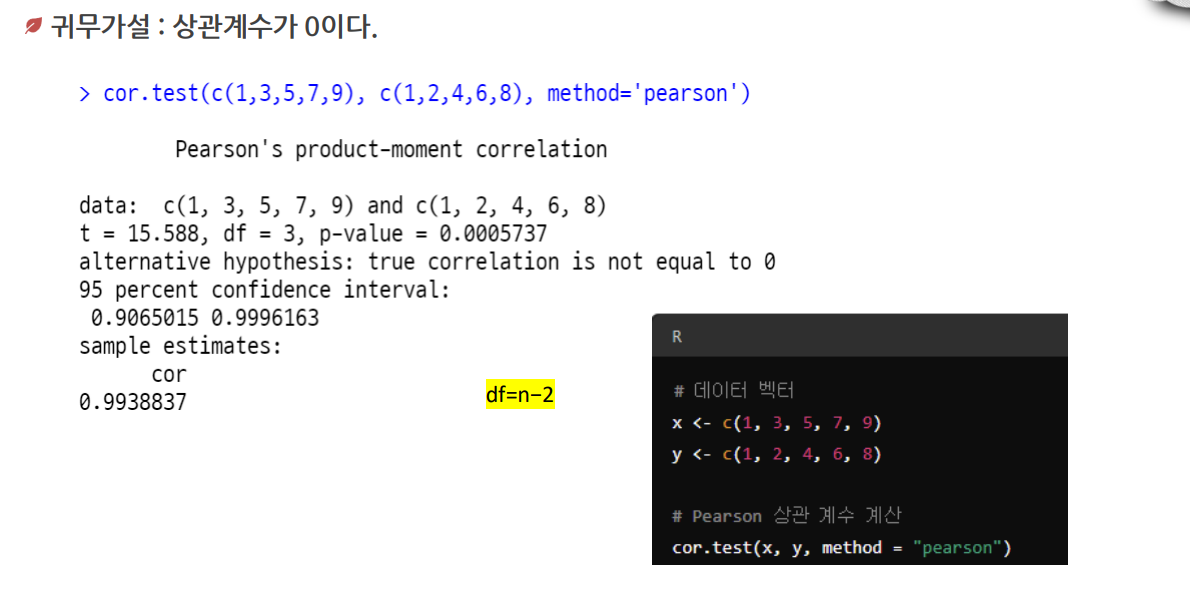

귀무가설: 상관 계수가 0이다. 즉, x와 y 사이에 선형적인 관계가 없다는 가설입니다.

cor.test(c(1,3,5,7,9), c(1,2,4,6,8), method='pearson'):

두 벡터 x와 y의 Pearson 상관 계수를 검정하는 함수입니다.
출력 해석:

t = 15.588: t-통계량 값으로, 검정의 강도를 나타냅니다.
df = 3: 자유도(degrees of freedom)로, n-2로 계산됩니다. 여기서 n은 데이터의 개수(5개)이고, 따라서 자유도는 5 - 2 = 3입니다.
p-value = 0.0005737: 귀무가설을 기각할지 결정하는 데 사용되는 값입니다. 일반적으로 p-값이 0.05보다 작으면 귀무가설을 기각할 수 있습니다. 여기서 p-값이 매우 작아 0.0005737이므로, x와 y 사이의 상관 관계가 0이 아님을 강하게 지지합니다.
95 percent confidence interval:

0.9065015와 0.9996163 사이에 진짜 상관 계수가 존재할 것으로 추정되는 구간입니다.
이는 상관 계수의 신뢰 구간을 나타내며, 상관 계수가 이 범위에 있을 가능성이 95%라는 의미입니다.
sample estimates:

cor = 0.9938837: 계산된 Pearson 상관 계수입니다. 이 값이 1에 가까울수록 강한 양의 상관 관계를 나타냅니다. 여기서는 0.9938837로, x와 y 사이에 매우 강한 양의 상관 관계가 있음을 보여줍니다.

In [ ]:
import numpy as np
from scipy.stats import pearsonr

# 데이터 벡터
x = np.array([1, 3, 5, 7, 9])
y = np.array([1, 2, 4, 6, 8])

# Pearson 상관 계수 계산
correlation, p_value = pearsonr(x, y)

print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)


Pearson correlation coefficient: 0.9938837346736191
P-value: 0.0005736731093321746
